In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
import seaborn as sns

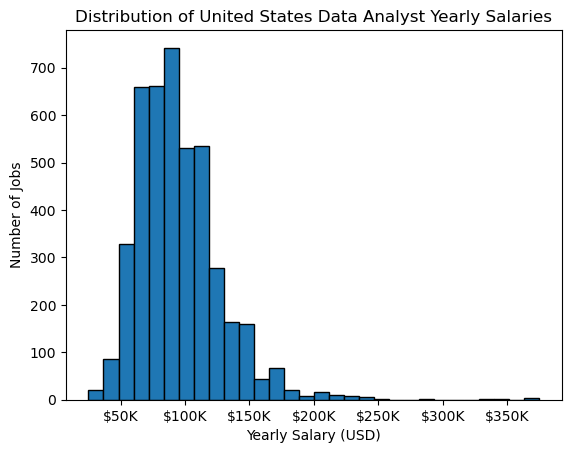

In [3]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()

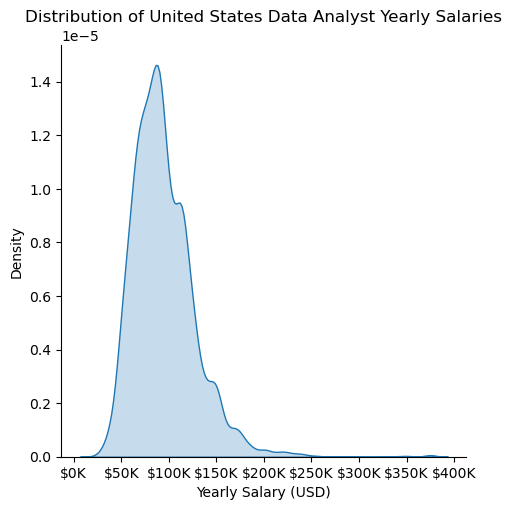

In [4]:
sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True, common_norm=False)

# this is all the same
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Density') # Density is the probability of a random variable taking on a particular value
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()

In [17]:
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

# filter for the job titles and country
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

# list of salaries for each job title
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

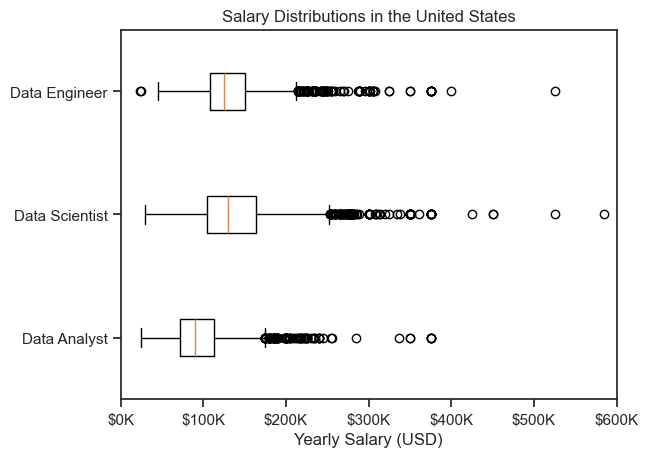

In [18]:
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

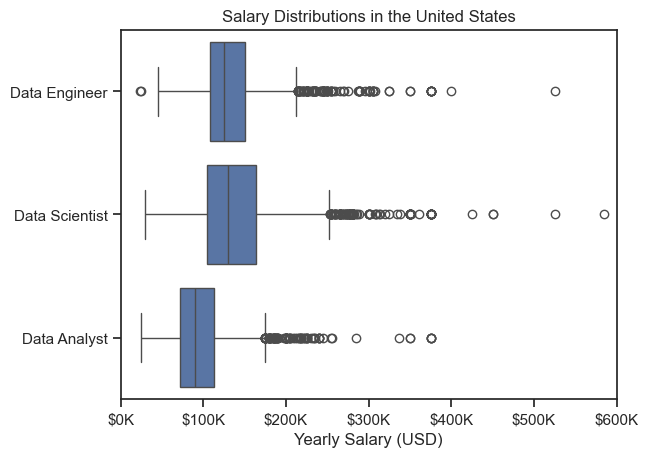

In [19]:
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')
sns.set_theme(style='ticks')

# this is all the same
plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [8]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)
df_DA_top_pay = df_DA_top_pay.head(10)
df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [9]:
df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)
df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


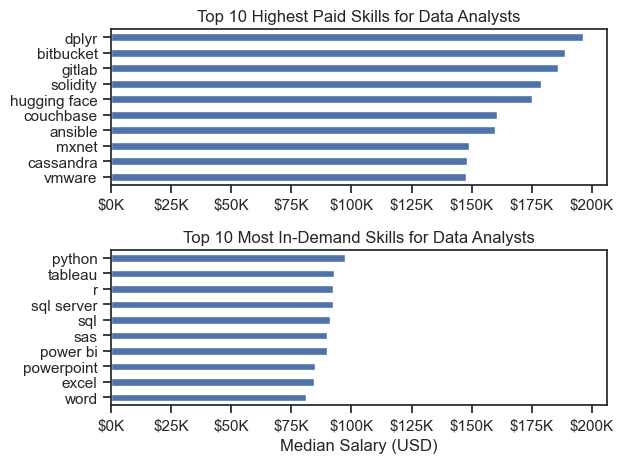

In [10]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts
df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

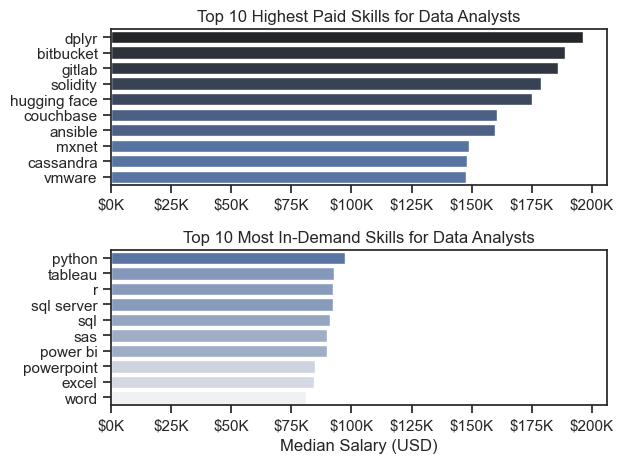

In [13]:
fig, ax = plt.subplots(2, 1)  

sns.set_theme(style='ticks') #con esto el color de la grafica cambia ligeramente del clasico a otro. Siempre debes revisar los cheatsheets!

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
# data es en que dataframe va a tomar la info, x es que columna te mostrará en la X en este caso es el salario median, luego la Y es lo que te mosstrará a la izquierda que vendrían a ser los skills. Hue es para decirle desde donde va a tomar el color, en este caso le dices que en median (las lineas que tienen color). Luego desde que AX debe empezar (este siempre será 0, el de abajo 1, el siguiente 2 y así sucesivamente) y finalmente palette que le diras que color GRADIENTE ocupar. Abajo sirve igualmente pero con el dato que corresponde. en data en vez de ir top_pay va _skills porque es lo que quieres mostrar en ese segundo grafico y si te fijas la info es identica salvo el AX que debes decirle que es el [1] en vez de [0].
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analystsr')
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

In [37]:
df_US_DA = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

df_DA_top_5 = df_US_DA.groupby('company_name')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DA_top_5 = df_DA_top_5.head().sort_values(by='median', ascending=False)
df_DA_top_5

# df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
# df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)
# df_DA_skills

,count,median
company_name,,
TikTok,100,209955.5
Meta,72,198500.0
Harnham,65,180000.0
Booz Allen Hamilton,129,115000.0
Leidos,81,114062.5


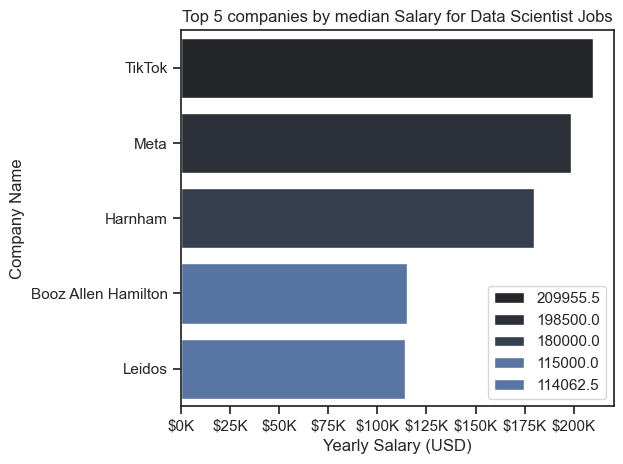

In [45]:
sns.barplot(data=df_DA_top_5, x='median', y=df_DA_top_5.index, hue='median', palette='dark:b_r')

sns.set_theme(style='ticks')

plt.title('Top 5 companies by median Salary for Data Scientist Jobs')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Company Name')
plt.legend(reverse=True)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.tight_layout()
plt.show()

C:\Users\arodr\AppData\Local\Temp\ipykernel_16940\675565607.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_companies, x='salary_year_avg', y='company_name', palette='tab10')


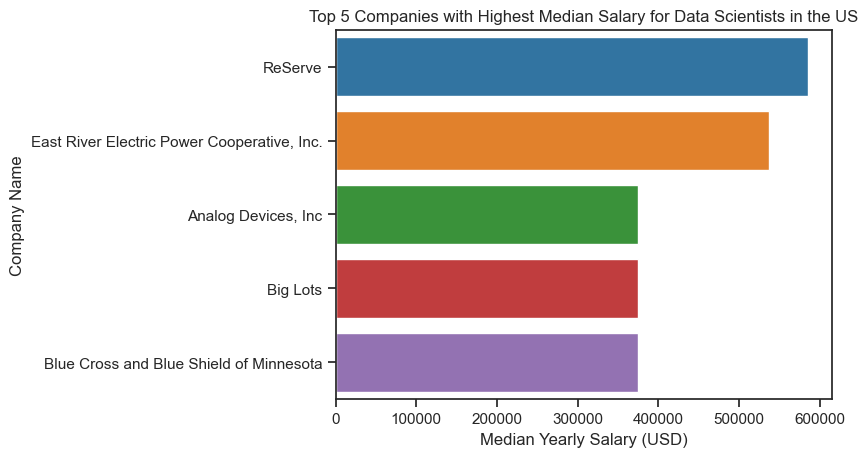

In [59]:
# Luke: fijate que usó nada mas el median sin usar el count. por eso la diferencia.


df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()
top_companies = df_DS_US.groupby('company_name')['salary_year_avg'].median().nlargest(5).reset_index()

sns.barplot(data=top_companies, x='salary_year_avg', y='company_name', palette='tab10')
plt.title('Top 5 Companies with Highest Median Salary for Data Scientists in the US')
plt.xlabel('Median Yearly Salary (USD)')
plt.ylabel('Company Name')
plt.show()

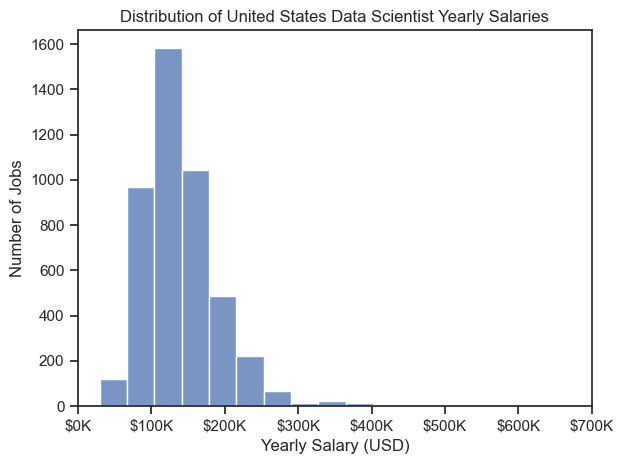

In [79]:
df_DS_salary = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()

sns.histplot(df_DS_salary['salary_year_avg'], bins=25, kde=False)

plt.title('Distribution of United States Data Scientist Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
plt.xlim(0, 700000) 
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.tight_layout()
plt.show()

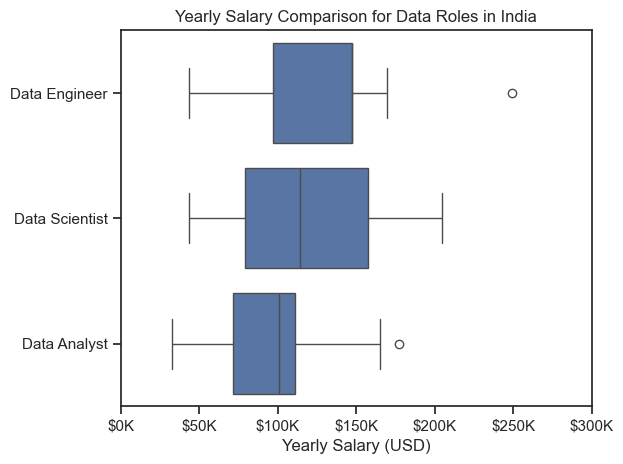

In [95]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_india = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'India')].dropna(subset=['salary_year_avg'])

sns.boxplot(data=df_india, x='salary_year_avg', y='job_title_short')
sns.set_theme(style='ticks')

# this is all the same
plt.title('Yearly Salary Comparison for Data Roles in India')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 300000) 
ticks_x = plt.FuncFormatter(lambda NOX, pos: f'${int(NOX/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
#plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k')) esto hace lo mismo que las 2 lineas de arriba. Leelo, lo entenderás rápido. Dentro del set_major_formatter esta lo que hiciste en ticks_x.

#punto aparte, dentro del lambda (donde dice NOX) tenias puesto y y dentro del f string tambien y/1000. No hubo ninguna diferencia ni se rompió el código porque la X aqui solo es el calling, es decir, al tu decirle que estas llamando al xaxis el entiende que donde cambiará es en la X indiferentemente del nombre que le des. De todas formas, es importante que el calling sea lo mas parecido a donde lo ocuparas para que se entienda bien a que hace llamado.

plt.tight_layout()
plt.show()


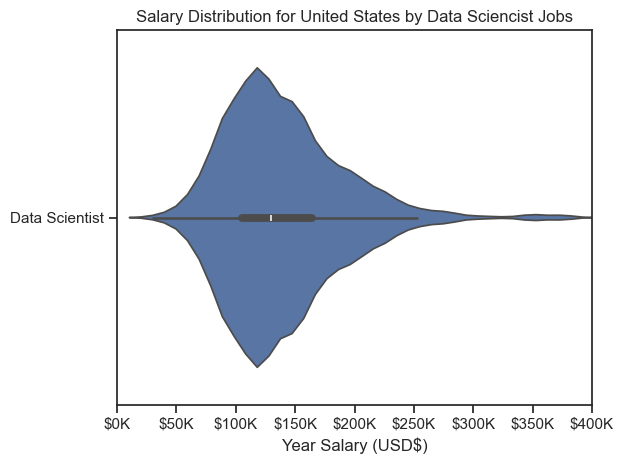

In [115]:
df_DS = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset='salary_year_avg').copy()

sns.violinplot(data=df_DS, x='salary_year_avg', y='job_title_short')

plt.title('Salary Distribution for United States by Data Sciencist Jobs')
plt.xlabel('Year Salary (USD$)')
plt.ylabel('')
plt.xlim(0, 400000)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

#Era igual al dato de luke, sólo que tu lo hiciste en la X axis y el lo pidió en la Y.

#Para modificarlo sólo tenías que setear lo siguiente: x='job_title_short', y='salary_year_avg'. Además de eso el XLIM era YLIM y en plt.gca().xaxis erra plt.gca().yaxis

#Todo lo demás estaba perfecto!

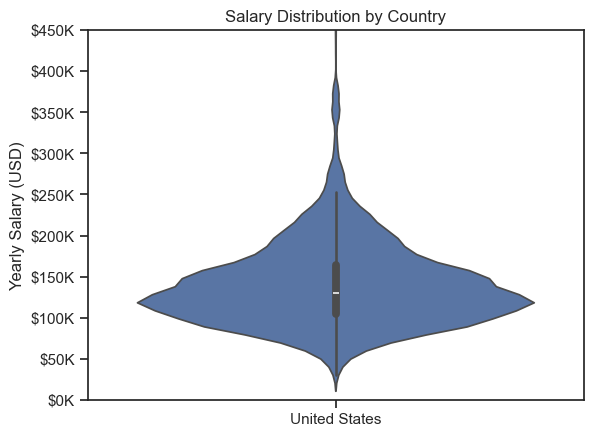

In [114]:
sns.violinplot(x='job_country', y='salary_year_avg', data=df_DS_US)
plt.title('Salary Distribution by Country')
plt.xlabel('')
plt.ylabel('Yearly Salary (USD)')
plt.ylim(0, 450000)  
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()